In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
file_path = '/content/HousingData.csv'
data = pd.read_csv(file_path)
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [3]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [4]:
print("Checking the null values of the dataset:")
print(data.isnull().sum())

Checking the null values of the dataset:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [5]:
# Handle missing values by filling them with the median value of the respective columns
data.fillna(data.median(), inplace=True)

In [6]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['MEDV'])
y = data['MEDV']


In [7]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
# Exploratory Data Analysis (EDA)
# Basic statistical analysis
print(data.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.479140   10.768775   11.028893    0.067194    0.554695    6.284634   
std      8.570832   23.025124    6.704679    0.250605    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.083235    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      2.808720    0.000000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.845850    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.486962    2.1057

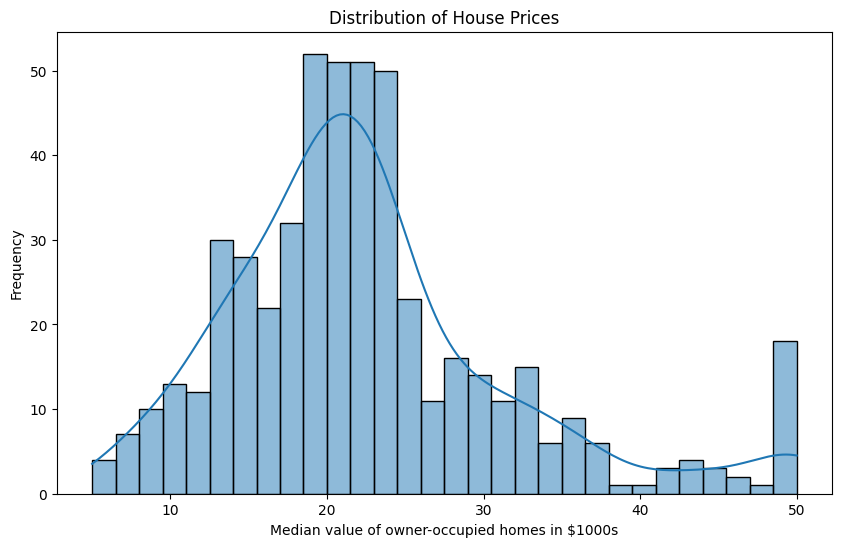

In [10]:
# Distribution of the target variable (MEDV)
plt.figure(figsize=(10, 6))
sns.histplot(data['MEDV'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Median value of owner-occupied homes in $1000s')
plt.ylabel('Frequency')
plt.show()

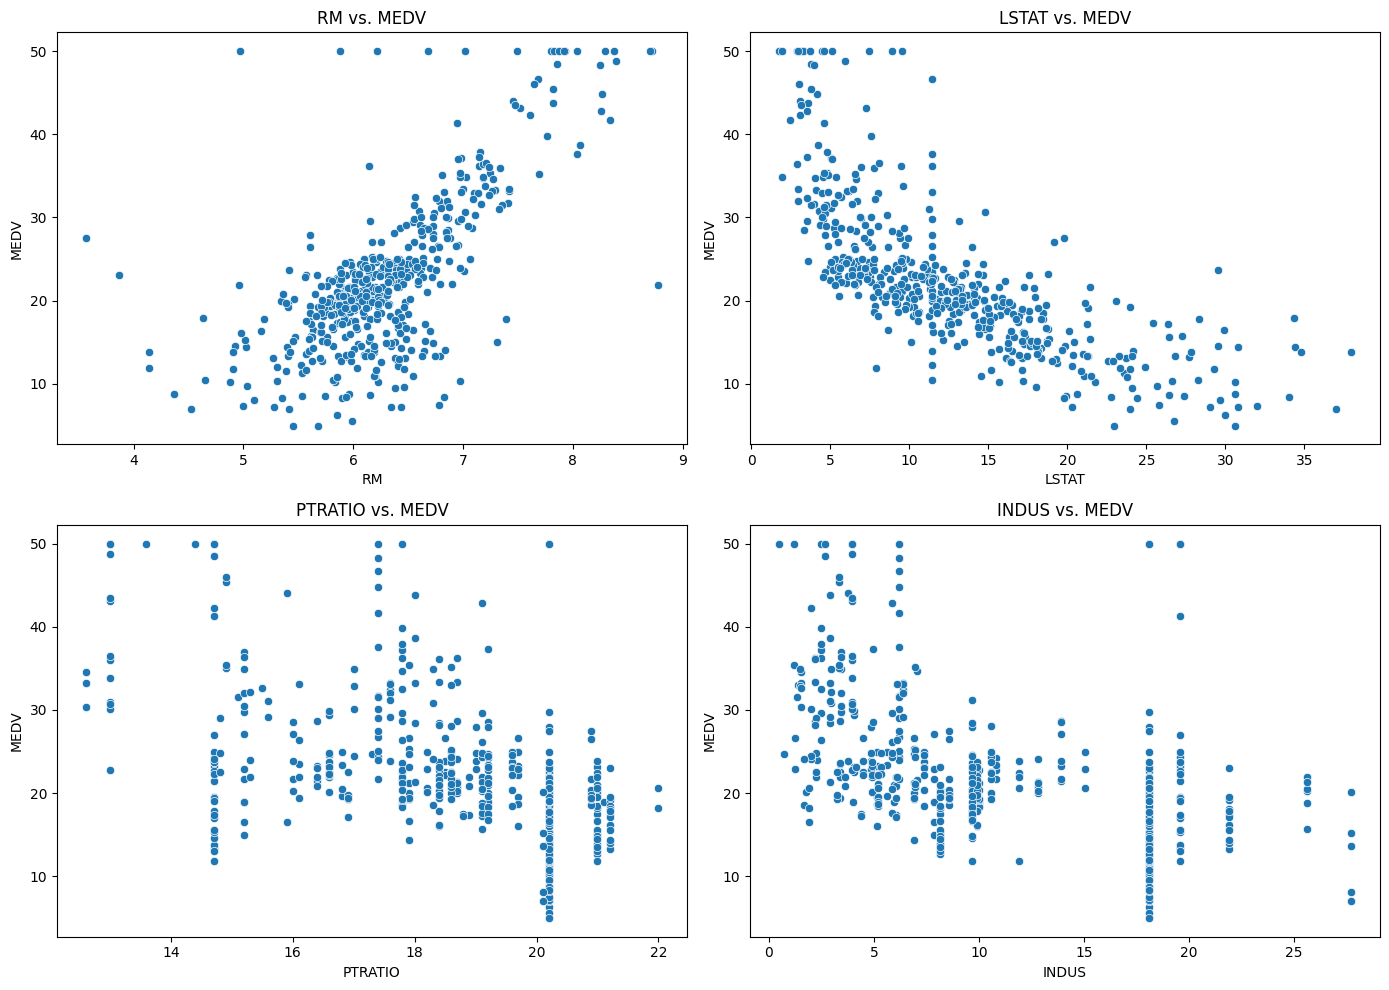

In [11]:
# Scatter plots of features vs. target variable
features = ['RM', 'LSTAT', 'PTRATIO', 'INDUS']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=data, x=feature, y='MEDV')
    plt.title(f'{feature} vs. MEDV')
plt.tight_layout()
plt.show()

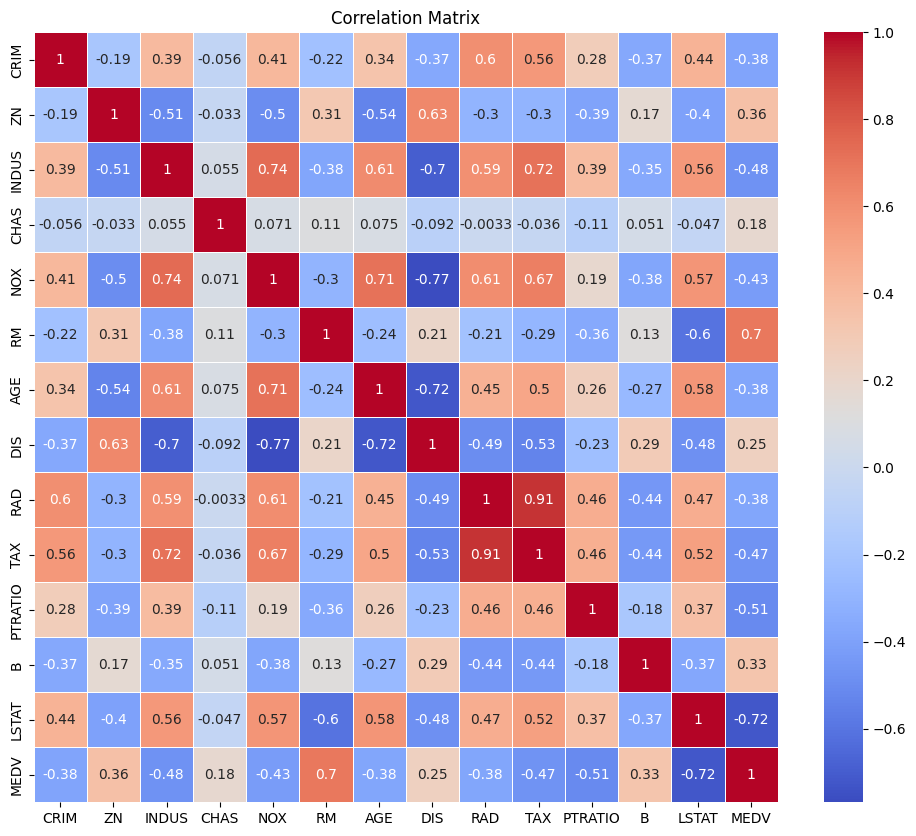

In [12]:
# Correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Building the linear regression model
model = LinearRegression()


In [14]:
# Training the model on the training dataset
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Making predictions on the testing dataset
y_pred = model.predict(X_test)


In [16]:
# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [17]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 24.999384790103367
R-squared: 0.659101389390351


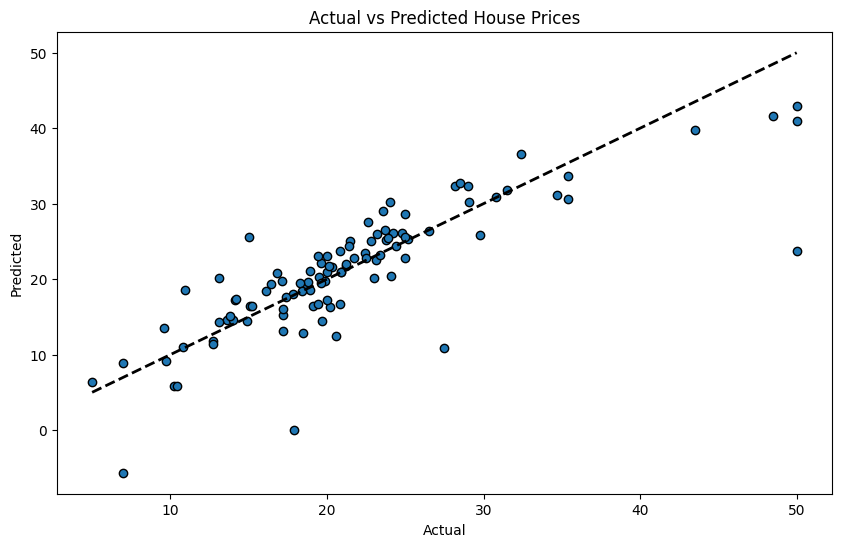

In [18]:
# Plotting Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices')
plt.show()

In [19]:
# Optional: Model Improvement with Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [20]:
# Polynomial regression with degree 2
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_test)


In [21]:
# Evaluating the polynomial regression model's performance
poly_mse = mean_squared_error(y_test, y_poly_pred)
poly_r2 = r2_score(y_test, y_poly_pred)

In [22]:
print(f"Polynomial Regression (Degree 2) - MSE: {poly_mse}, R-squared: {poly_r2}")

Polynomial Regression (Degree 2) - MSE: 16.066695906198493, R-squared: 0.7809100360870059
